In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import pandas as pd

In [2]:
df = pd.read_csv("E:/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

age = 0
sex = 1
bmi = 2
charges = 4
smoker = 'c'

In [3]:
d = 4
V = []
C = []

for i in range(1338):
    v = []
    c = 0
    v.append(df['age'][i])
    if df['sex'][i] == 'male':
        v.append(1)
    else:
        v.append(-1)
    v.append(df['bmi'][i])
    v.append(df['charges'][i])
    if df['smoker'][i] == 'yes':
        c = 1
    else:
        c = -1
    V.append(v)
    C.append(c)
V = np.array(V)
C = np.array(C)
length = len(V)
print(length)

1338


In [24]:

#W = np.array([np.random.randint(-10,10) for i in range(d)])
W = np.random.rand(d)
b = np.random.random()
print(W)
print(b)

[0.14363346 0.67432416 0.0105331  0.94941904]
0.7786556937239764


In [192]:
learning_rate = 0.000001

In [148]:
def predict(v,W,b):
    return W.dot(v)+b
def error(c_real,c_pred):  
    #print(c_real,c_pred)
    return 1/(1+math.exp(c_real*c_pred))
    
def error_partial_derivative_wj(v,c_real,c_pred,j):
    r = error(c_real,c_pred)
    return -1*r*(1-r)*c_real*v[j]
def error_partial_derivative_b(c_real,c_pred):
    r = error(c_real,c_pred)
    return -1*r*(1-r)*c_real
def average_error(C_real,C_pred,length):
    summation = 0
    for i in range(length):
        summation += error(C_real[i],C_pred[i])
    return summation/length
def average_error_partial_derivative_wj(V,C_real,C_pred,length,j):
    summation = 0
    for i in range(length):
        summation += error_partial_derivative_wj(V[i],C_real[i],C_pred[i],j)
    return summation/length
def average_error_partial_derivative_b(C_real,C_pred,length):
    summation = 0
    for i in range(length):
        summation += error_partial_derivative_b(C_real[i],C_pred[i])
    return summation/length
def train(V,C,initial_weights,bias):
    length = len(V)
    num_dimensions = len(initial_weights)
    if length != len(C) or V.shape[1]!=num_dimensions or len(initial_weights.shape)>1:
        return None
    W = initial_weights.copy()
    
    C_pred = np.array([predict(V[i],W,bias) for i in range(length)])
    count = 0
    print(num_dimensions,C_pred)
    try : 
        E = average_error(C,C_pred,length)
        
        while (E>0):
            for w in range(num_dimensions):
                pd = average_error_partial_derivative_wj(V,C,C_pred,length,w)
                W[w]-= (pd*learning_rate)
                C_pred = np.array([predict(V[i],W,bias) for i in range(length)])
                #print(count)
            bias -= (average_error_partial_derivative_b(C,C_pred,length)*learning_rate)
            #print("*")
            C_pred = np.array([predict(V[i],W,bias) for i in range(length)])
            E = average_error(C,C_pred,length)
            print(W,bias,E)
            if (count == 100000) :
                count = 0
            count += 1
    except OverflowError as e:
        raise OverflowError
        #print(e)
        #return train(V,C,np.zeros(num_dimensions),0)
    return (W,bias,E)

[-5.85818386e-01  7.53008489e-09 -4.40997516e-06  6.93586814e-04] 0.0006745317505628548 0.11757560223448767
\nCorrectness 88%.

[-1.17163685e+00  6.42823719e-10 -1.25854000e-07  4.61780660e-05] -4.106134118200992e-09 0.20478325860632 79%

[-8.78727578e+00  2.11473158e-68 -3.82287017e-65 -3.87730172e-63] -1.205926633553525e-66 0.20478325859491778 79.52167414050822%

[-5.85820863e-01  9.09443660e-07 -2.58366394e-05  1.42121330e-03] 0.0006742876426409363 0.06480175739451166 93.72197309417041%


In [193]:
V = np.array(V)
new_w,new_b,err = train(V,C,new_w,new_b)

4 [ 12.86627087  -8.09343973 -10.08029837 ...  -8.22963904  -9.44916693
   5.68100402]
[-5.85825177e-01  1.89915847e-06 -5.04382937e-05  1.42124918e-03] 0.0006739605394093622 0.06480093163721562
[-5.85825182e-01  1.90046626e-06 -5.04708000e-05  1.42124924e-03] 0.0006739601072266705 0.0648009305461902
[-5.85825188e-01  1.90177405e-06 -5.05033062e-05  1.42124929e-03] 0.0006739596750439675 0.06480092945516495
[-5.85825194e-01  1.90308184e-06 -5.05358125e-05  1.42124934e-03] 0.0006739592428612985 0.06480092836414003
[-5.85825199e-01  1.90438962e-06 -5.05683187e-05  1.42124939e-03] 0.0006739588106786898 0.06480092727311522
[-5.85825205e-01  1.90569741e-06 -5.06008250e-05  1.42124944e-03] 0.0006739583784961566 0.0648009261820907
[-5.85825211e-01  1.90700520e-06 -5.06333312e-05  1.42124949e-03] 0.0006739579463137079 0.06480092509106637
[-5.85825217e-01  1.90831299e-06 -5.06658375e-05  1.42124954e-03] 0.0006739575141313489 0.06480092400004238
[-5.85825222e-01  1.90962078e-06 -5.06983437e-05  1

[-5.85825610e-01  1.99855062e-06 -5.29087602e-05  1.42125281e-03] 0.0006739276937816951 0.06480084871995888
[-5.85825615e-01  1.99985842e-06 -5.29412663e-05  1.42125286e-03] 0.0006739272616061027 0.06480084762895155
[-5.85825621e-01  2.00116621e-06 -5.29737723e-05  1.42125290e-03] 0.000673926829430607 0.06480084653794438
[-5.85825627e-01  2.00247400e-06 -5.30062783e-05  1.42125295e-03] 0.0006739263972552082 0.06480084544693758
[-5.85825633e-01  2.00378180e-06 -5.30387843e-05  1.42125300e-03] 0.0006739259650799061 0.06480084435593098
[-5.85825638e-01  2.00508959e-06 -5.30712903e-05  1.42125304e-03] 0.0006739255329047009 0.06480084326492455
[-5.85825644e-01  2.00639739e-06 -5.31037963e-05  1.42125309e-03] 0.0006739251007295924 0.06480084217391832
[-5.85825650e-01  2.00770518e-06 -5.31363023e-05  1.42125314e-03] 0.0006739246685545808 0.06480084108291254
[-5.85825655e-01  2.00901298e-06 -5.31688083e-05  1.42125319e-03] 0.0006739242363796661 0.06480083999190686
[-5.85825661e-01  2.01032077e

[-5.85826054e-01  2.10055877e-06 -5.54442196e-05  1.42125650e-03] 0.0006738939843761856 0.06480076362210306
[-5.85826060e-01  2.10186657e-06 -5.54767254e-05  1.42125655e-03] 0.0006738935522081437 0.06480076253111439
[-5.85826066e-01  2.10317437e-06 -5.55092311e-05  1.42125660e-03] 0.0006738931200401988 0.0648007614401258
[-5.85826071e-01  2.10448217e-06 -5.55417369e-05  1.42125665e-03] 0.0006738926878723506 0.06480076034913769
[-5.85826077e-01  2.10578997e-06 -5.55742426e-05  1.42125669e-03] 0.0006738922557045991 0.06480075925814957
[-5.85826083e-01  2.10709777e-06 -5.56067484e-05  1.42125674e-03] 0.0006738918235369445 0.06480075816716183
[-5.85826088e-01  2.10840557e-06 -5.56392541e-05  1.42125679e-03] 0.0006738913913693867 0.06480075707617436
[-5.85826094e-01  2.10971337e-06 -5.56717599e-05  1.42125684e-03] 0.0006738909592019257 0.06480075598518698
[-5.85826100e-01  2.11102117e-06 -5.57042656e-05  1.42125688e-03] 0.0006738905270345615 0.06480075489419994
[-5.85826105e-01  2.11232897e

[-5.85826487e-01  2.19995173e-06 -5.79146483e-05  1.42126010e-03] 0.0006738611398808853 0.06480068070764086
[-5.85826493e-01  2.20125953e-06 -5.79471538e-05  1.42126015e-03] 0.0006738607077202001 0.06480067961667037
[-5.85826499e-01  2.20256734e-06 -5.79796593e-05  1.42126020e-03] 0.0006738602755596118 0.06480067852569994
[-5.85826504e-01  2.20387514e-06 -5.80121648e-05  1.42126025e-03] 0.0006738598433991203 0.06480067743472993
[-5.85826510e-01  2.20518295e-06 -5.80446703e-05  1.42126029e-03] 0.0006738594112387255 0.06480067634376012
[-5.85826516e-01  2.20649075e-06 -5.80771758e-05  1.42126034e-03] 0.0006738589790784275 0.06480067525279039
[-5.85826521e-01  2.20779856e-06 -5.81096813e-05  1.42126039e-03] 0.0006738585469182264 0.06480067416182111
[-5.85826527e-01  2.20910636e-06 -5.81421868e-05  1.42126044e-03] 0.000673858114758122 0.06480067307085195
[-5.85826533e-01  2.21041417e-06 -5.81746923e-05  1.42126048e-03] 0.0006738576825981145 0.064800671979883
[-5.85826539e-01  2.21172197e-0

[-5.85826920e-01  2.29934508e-06 -6.03850582e-05  1.42126371e-03] 0.0006738282959446797 0.06480059779455787
[-5.85826926e-01  2.30065289e-06 -6.04175635e-05  1.42126375e-03] 0.0006738278637913509 0.06480059670360547
[-5.85826932e-01  2.30196070e-06 -6.04500688e-05  1.42126380e-03] 0.0006738274316381189 0.06480059561265329
[-5.85826937e-01  2.30326851e-06 -6.04825740e-05  1.42126385e-03] 0.0006738269994849837 0.06480059452170137
[-5.85826943e-01  2.30457632e-06 -6.05150793e-05  1.42126389e-03] 0.0006738265673319453 0.06480059343074958
[-5.85826949e-01  2.30588413e-06 -6.05475846e-05  1.42126394e-03] 0.0006738261351790036 0.06480059233979826
[-5.85826954e-01  2.30719194e-06 -6.05800898e-05  1.42126399e-03] 0.0006738257030261587 0.06480059124884684
[-5.85826960e-01  2.30849975e-06 -6.06125951e-05  1.42126404e-03] 0.0006738252708734107 0.06480059015789595
[-5.85826966e-01  2.30980756e-06 -6.06451003e-05  1.42126408e-03] 0.0006738248387207595 0.06480058906694527
[-5.85826972e-01  2.31111537

[-5.85827365e-01  2.40135446e-06 -6.29204596e-05  1.42126740e-03] 0.0006737945882756939 0.06480051270098551
[-5.85827370e-01  2.40266227e-06 -6.29529646e-05  1.42126745e-03] 0.0006737941561299147 0.06480051161005185
[-5.85827376e-01  2.40397009e-06 -6.29854696e-05  1.42126750e-03] 0.0006737937239842323 0.06480051051911821
[-5.85827382e-01  2.40527791e-06 -6.30179746e-05  1.42126754e-03] 0.0006737932918386466 0.06480050942818495
[-5.85827387e-01  2.40658572e-06 -6.30504796e-05  1.42126759e-03] 0.0006737928596931577 0.06480050833725175
[-5.85827393e-01  2.40789354e-06 -6.30829846e-05  1.42126764e-03] 0.0006737924275477656 0.06480050724631897
[-5.85827399e-01  2.40920135e-06 -6.31154896e-05  1.42126768e-03] 0.0006737919954024703 0.0648005061553863
[-5.85827405e-01  2.41050917e-06 -6.31479946e-05  1.42126773e-03] 0.0006737915632572717 0.064800505064454
[-5.85827410e-01  2.41181698e-06 -6.31804996e-05  1.42126778e-03] 0.00067379113111217 0.0648005039735218
[-5.85827416e-01  2.41312480e-06 -

[-5.85827809e-01  2.50336426e-06 -6.54558412e-05  1.42127110e-03] 0.0006737608811955598 0.06480042760886569
[-5.85827815e-01  2.50467208e-06 -6.54883460e-05  1.42127114e-03] 0.0006737604490573298 0.0648004265179506
[-5.85827820e-01  2.50597990e-06 -6.55208508e-05  1.42127119e-03] 0.0006737600169191965 0.06480042542703562
[-5.85827826e-01  2.50728772e-06 -6.55533555e-05  1.42127124e-03] 0.00067375958478116 0.064800424336121
[-5.85827832e-01  2.50859554e-06 -6.55858603e-05  1.42127129e-03] 0.0006737591526432203 0.06480042324520642
[-5.85827838e-01  2.50990336e-06 -6.56183650e-05  1.42127133e-03] 0.0006737587205053775 0.06480042215429219
[-5.85827843e-01  2.51121118e-06 -6.56508698e-05  1.42127138e-03] 0.0006737582883676313 0.06480042106337819
[-5.85827849e-01  2.51251900e-06 -6.56833745e-05  1.42127143e-03] 0.000673757856229982 0.06480041997246445
[-5.85827855e-01  2.51382682e-06 -6.57158793e-05  1.42127147e-03] 0.0006737574240924294 0.06480041888155076
[-5.85827860e-01  2.51513464e-06 -

[-5.85828253e-01  2.60537447e-06 -6.79912032e-05  1.42127479e-03] 0.0006737271747042494 0.06480034251819825
[-5.85828259e-01  2.60668230e-06 -6.80237077e-05  1.42127484e-03] 0.0006737267425735682 0.06480034142730165
[-5.85828265e-01  2.60799012e-06 -6.80562122e-05  1.42127489e-03] 0.0006737263104429837 0.06480034033640535
[-5.85828270e-01  2.60929795e-06 -6.80887167e-05  1.42127493e-03] 0.0006737258783124961 0.06480033924550933
[-5.85828276e-01  2.61060577e-06 -6.81212212e-05  1.42127498e-03] 0.0006737254461821053 0.06480033815461327
[-5.85828282e-01  2.61191360e-06 -6.81537257e-05  1.42127503e-03] 0.0006737250140518112 0.06480033706371773
[-5.85828288e-01  2.61322143e-06 -6.81862302e-05  1.42127508e-03] 0.0006737245819216139 0.06480033597282239
[-5.85828293e-01  2.61452925e-06 -6.82187347e-05  1.42127512e-03] 0.0006737241497915133 0.06480033488192721
[-5.85828299e-01  2.61583708e-06 -6.82512392e-05  1.42127517e-03] 0.0006737237176615095 0.06480033379103235
[-5.85828305e-01  2.61714491

[-5.85828692e-01  2.70607727e-06 -7.04940413e-05  1.42127844e-03] 0.0006736939009249634 0.06480025851986126
[-5.85828698e-01  2.70738510e-06 -7.05265455e-05  1.42127849e-03] 0.0006736934688017338 0.06480025742898297
[-5.85828703e-01  2.70869293e-06 -7.05590498e-05  1.42127853e-03] 0.0006736930366786011 0.064800256338105
[-5.85828709e-01  2.71000076e-06 -7.05915540e-05  1.42127858e-03] 0.0006736926045555652 0.06480025524722736
[-5.85828715e-01  2.71130859e-06 -7.06240583e-05  1.42127863e-03] 0.0006736921724326259 0.0648002541563499
[-5.85828721e-01  2.71261643e-06 -7.06565625e-05  1.42127868e-03] 0.0006736917403097836 0.06480025306547252
[-5.85828726e-01  2.71392426e-06 -7.06890668e-05  1.42127872e-03] 0.0006736913081870379 0.06480025197459578
[-5.85828732e-01  2.71523209e-06 -7.07215710e-05  1.42127877e-03] 0.000673690876064389 0.0648002508837189
[-5.85828738e-01  2.71653992e-06 -7.07540753e-05  1.42127882e-03] 0.0006736904439418369 0.06480024979284242
[-5.85828743e-01  2.71784775e-06 

[-5.85829131e-01  2.80678047e-06 -7.29968601e-05  1.42128209e-03] 0.0006736606277194444 0.06480017452293917
[-5.85829136e-01  2.80808831e-06 -7.30293641e-05  1.42128213e-03] 0.0006736601956036663 0.06480017343207951
[-5.85829142e-01  2.80939615e-06 -7.30618682e-05  1.42128218e-03] 0.0006736597634879849 0.06480017234121985
[-5.85829148e-01  2.81070398e-06 -7.30943722e-05  1.42128223e-03] 0.0006736593313724003 0.06480017125036058
[-5.85829153e-01  2.81201182e-06 -7.31268762e-05  1.42128228e-03] 0.0006736588992569125 0.06480017015950153
[-5.85829159e-01  2.81331966e-06 -7.31593802e-05  1.42128232e-03] 0.0006736584671415214 0.0648001690686426
[-5.85829165e-01  2.81462749e-06 -7.31918842e-05  1.42128237e-03] 0.0006736580350262271 0.06480016797778398
[-5.85829171e-01  2.81593533e-06 -7.32243882e-05  1.42128242e-03] 0.0006736576029110295 0.06480016688692568
[-5.85829176e-01  2.81724317e-06 -7.32568922e-05  1.42128247e-03] 0.0006736571707959288 0.06480016579606757
[-5.85829182e-01  2.81855101e

[-5.85829575e-01  2.90879193e-06 -7.55321636e-05  1.42128578e-03] 0.0006736269229793382 0.06480008943659106
[-5.85829581e-01  2.91009977e-06 -7.55646674e-05  1.42128583e-03] 0.0006736264908711078 0.06480008834574982
[-5.85829586e-01  2.91140761e-06 -7.55971711e-05  1.42128588e-03] 0.0006736260587629742 0.0648000872549088
[-5.85829592e-01  2.91271545e-06 -7.56296749e-05  1.42128592e-03] 0.0006736256266549373 0.06480008616406811
[-5.85829598e-01  2.91402330e-06 -7.56621786e-05  1.42128597e-03] 0.0006736251945469972 0.06480008507322775
[-5.85829603e-01  2.91533114e-06 -7.56946824e-05  1.42128602e-03] 0.0006736247624391539 0.06480008398238754
[-5.85829609e-01  2.91663898e-06 -7.57271861e-05  1.42128607e-03] 0.0006736243303314072 0.06480008289154743
[-5.85829615e-01  2.91794682e-06 -7.57596899e-05  1.42128611e-03] 0.0006736238982237575 0.06480008180070769
[-5.85829621e-01  2.91925466e-06 -7.57921936e-05  1.42128616e-03] 0.0006736234661162044 0.06480008070986831
[-5.85829626e-01  2.92056251e

[-5.85830014e-01  3.00949595e-06 -7.80349439e-05  1.42128943e-03] 0.0006735936509287223 0.0648000054425175
[-5.85830019e-01  3.01080380e-06 -7.80674474e-05  1.42128948e-03] 0.0006735932188279425 0.06480000435169472
[-5.85830025e-01  3.01211165e-06 -7.80999509e-05  1.42128952e-03] 0.0006735927867272595 0.06480000326087214
[-5.85830031e-01  3.01341949e-06 -7.81324544e-05  1.42128957e-03] 0.0006735923546266732 0.06480000217004978
[-5.85830036e-01  3.01472734e-06 -7.81649579e-05  1.42128962e-03] 0.0006735919225261837 0.06480000107922779
[-5.85830042e-01  3.01603519e-06 -7.81974614e-05  1.42128967e-03] 0.0006735914904257909 0.06479999998840581
[-5.85830048e-01  3.01734304e-06 -7.82299649e-05  1.42128971e-03] 0.0006735910583254949 0.06479999889758431
[-5.85830053e-01  3.01865088e-06 -7.82624684e-05  1.42128976e-03] 0.0006735906262252956 0.06479999780676282
[-5.85830059e-01  3.01995873e-06 -7.82949719e-05  1.42128981e-03] 0.0006735901941251932 0.0647999967159417
[-5.85830065e-01  3.02126658e-

[-5.85830452e-01  3.11020038e-06 -8.05377050e-05  1.42129308e-03] 0.0006735603794517912 0.06479992144985894
[-5.85830458e-01  3.11150823e-06 -8.05702083e-05  1.42129312e-03] 0.0006735599473584617 0.06479992035905449
[-5.85830464e-01  3.11281609e-06 -8.06027115e-05  1.42129317e-03] 0.0006735595152652289 0.06479991926825038
[-5.85830469e-01  3.11412394e-06 -8.06352148e-05  1.42129322e-03] 0.0006735590831720929 0.0647999181774464
[-5.85830475e-01  3.11543179e-06 -8.06677180e-05  1.42129327e-03] 0.0006735586510790536 0.06479991708664273
[-5.85830481e-01  3.11673964e-06 -8.07002213e-05  1.42129331e-03] 0.0006735582189861111 0.06479991599583898
[-5.85830486e-01  3.11804750e-06 -8.07327245e-05  1.42129336e-03] 0.0006735577868932654 0.06479991490503581
[-5.85830492e-01  3.11935535e-06 -8.07652278e-05  1.42129341e-03] 0.0006735573548005164 0.06479991381423295
[-5.85830498e-01  3.12066320e-06 -8.07977310e-05  1.42129346e-03] 0.0006735569227078642 0.06479991272343007
[-5.85830503e-01  3.12197106e

[-5.85830891e-01  3.21090522e-06 -8.30404470e-05  1.42129672e-03] 0.0006735271085485173 0.06479983745861521
[-5.85830896e-01  3.21221308e-06 -8.30729500e-05  1.42129677e-03] 0.0006735266764626378 0.06479983636782909
[-5.85830902e-01  3.21352093e-06 -8.31054530e-05  1.42129682e-03] 0.0006735262443768549 0.06479983527704328
[-5.85830908e-01  3.21482879e-06 -8.31379560e-05  1.42129687e-03] 0.0006735258122911688 0.06479983418625763
[-5.85830914e-01  3.21613665e-06 -8.31704590e-05  1.42129691e-03] 0.0006735253802055795 0.06479983309547233
[-5.85830919e-01  3.21744451e-06 -8.32029620e-05  1.42129696e-03] 0.0006735249481200869 0.06479983200468722
[-5.85830925e-01  3.21875237e-06 -8.32354650e-05  1.42129701e-03] 0.000673524516034691 0.06479983091390222
[-5.85830931e-01  3.22006022e-06 -8.32679680e-05  1.42129706e-03] 0.0006735240839493919 0.06479982982311762
[-5.85830936e-01  3.22136808e-06 -8.33004710e-05  1.42129710e-03] 0.0006735236518641896 0.06479982873233324
[-5.85830942e-01  3.22267594e

[-5.85831335e-01  3.31291832e-06 -8.55756725e-05  1.42130042e-03] 0.0006734934061404436 0.06479975237801816
[-5.85831341e-01  3.31422619e-06 -8.56081753e-05  1.42130047e-03] 0.0006734929740621103 0.0647997512872507
[-5.85831346e-01  3.31553405e-06 -8.56406780e-05  1.42130051e-03] 0.0006734925419838737 0.06479975019648347
[-5.85831352e-01  3.31684191e-06 -8.56731808e-05  1.42130056e-03] 0.000673492109905734 0.06479974910571648
[-5.85831358e-01  3.31814978e-06 -8.57056835e-05  1.42130061e-03] 0.0006734916778276909 0.06479974801494974
[-5.85831364e-01  3.31945764e-06 -8.57381863e-05  1.42130066e-03] 0.0006734912457497446 0.0647997469241833
[-5.85831369e-01  3.32076550e-06 -8.57706890e-05  1.42130070e-03] 0.0006734908136718951 0.06479974583341701
[-5.85831375e-01  3.32207337e-06 -8.58031918e-05  1.42130075e-03] 0.0006734903815941422 0.06479974474265092
[-5.85831381e-01  3.32338123e-06 -8.58356945e-05  1.42130080e-03] 0.0006734899495164862 0.06479974365188533
[-5.85831386e-01  3.32468909e-0

[-5.85831785e-01  3.41623971e-06 -8.81433809e-05  1.42130416e-03] 0.0006734592722501804 0.06479966620812402
[-5.85831791e-01  3.41754758e-06 -8.81758834e-05  1.42130421e-03] 0.0006734588401794897 0.06479966511737542
[-5.85831796e-01  3.41885545e-06 -8.82083859e-05  1.42130426e-03] 0.0006734584081088959 0.06479966402662703
[-5.85831802e-01  3.42016332e-06 -8.82408884e-05  1.42130430e-03] 0.0006734579760383988 0.06479966293587888
[-5.85831808e-01  3.42147119e-06 -8.82733909e-05  1.42130435e-03] 0.0006734575439679984 0.06479966184513102
[-5.85831813e-01  3.42277906e-06 -8.83058934e-05  1.42130440e-03] 0.0006734571118976947 0.06479966075438345
[-5.85831819e-01  3.42408693e-06 -8.83383959e-05  1.42130445e-03] 0.0006734566798274878 0.06479965966363599
[-5.85831825e-01  3.42539480e-06 -8.83708984e-05  1.42130449e-03] 0.0006734562477573777 0.06479965857288864
[-5.85831831e-01  3.42670266e-06 -8.84034009e-05  1.42130454e-03] 0.0006734558156873642 0.06479965748214175
[-5.85831836e-01  3.42801053

[-5.85832224e-01  3.51694579e-06 -9.06460646e-05  1.42130781e-03] 0.0006734260030900608 0.06479958222117908
[-5.85832229e-01  3.51825366e-06 -9.06785669e-05  1.42130786e-03] 0.0006734255710268191 0.06479958113044869
[-5.85832235e-01  3.51956153e-06 -9.07110691e-05  1.42130790e-03] 0.0006734251389636741 0.06479958003971868
[-5.85832241e-01  3.52086941e-06 -9.07435714e-05  1.42130795e-03] 0.0006734247069006258 0.06479957894898886
[-5.85832246e-01  3.52217728e-06 -9.07760736e-05  1.42130800e-03] 0.0006734242748376742 0.06479957785825959
[-5.85832252e-01  3.52348515e-06 -9.08085759e-05  1.42130805e-03] 0.0006734238427748194 0.06479957676753009
[-5.85832258e-01  3.52479303e-06 -9.08410781e-05  1.42130809e-03] 0.0006734234107120613 0.06479957567680113
[-5.85832263e-01  3.52610090e-06 -9.08735804e-05  1.42130814e-03] 0.0006734229786493999 0.06479957458607241
[-5.85832269e-01  3.52740878e-06 -9.09060826e-05  1.42130819e-03] 0.0006734225465868353 0.06479957349534375
[-5.85832275e-01  3.52871665

[-5.85832673e-01  3.62026802e-06 -9.32137332e-05  1.42131155e-03] 0.0006733918703919988 0.06479949605422491
[-5.85832679e-01  3.62157590e-06 -9.32462352e-05  1.42131160e-03] 0.0006733914383363989 0.0647994949635134
[-5.85832685e-01  3.62288378e-06 -9.32787372e-05  1.42131165e-03] 0.0006733910062808958 0.06479949387280223
[-5.85832691e-01  3.62419166e-06 -9.33112392e-05  1.42131169e-03] 0.0006733905742254895 0.06479949278209128
[-5.85832696e-01  3.62549954e-06 -9.33437412e-05  1.42131174e-03] 0.0006733901421701799 0.06479949169138065
[-5.85832702e-01  3.62680742e-06 -9.33762432e-05  1.42131179e-03] 0.000673389710114967 0.06479949060067035
[-5.85832708e-01  3.62811530e-06 -9.34087452e-05  1.42131184e-03] 0.0006733892780598508 0.06479948950996003
[-5.85832713e-01  3.62942318e-06 -9.34412471e-05  1.42131188e-03] 0.0006733888460048313 0.06479948841924997
[-5.85832719e-01  3.63073106e-06 -9.34737491e-05  1.42131193e-03] 0.0006733884139499086 0.06479948732854027
[-5.85832725e-01  3.63203893e-

[-5.85833112e-01  3.72097491e-06 -9.57163781e-05  1.42131520e-03] 0.0006733586023938426 0.06479941207014515
[-5.85833118e-01  3.72228280e-06 -9.57488798e-05  1.42131525e-03] 0.0006733581703456909 0.06479941097945206
[-5.85833123e-01  3.72359068e-06 -9.57813816e-05  1.42131529e-03] 0.0006733577382976359 0.06479940988875933
[-5.85833129e-01  3.72489857e-06 -9.58138833e-05  1.42131534e-03] 0.0006733573062496776 0.06479940879806681
[-5.85833135e-01  3.72620645e-06 -9.58463851e-05  1.42131539e-03] 0.000673356874201816 0.06479940770737448
[-5.85833140e-01  3.72751434e-06 -9.58788868e-05  1.42131544e-03] 0.0006733564421540512 0.06479940661668245
[-5.85833146e-01  3.72882222e-06 -9.59113886e-05  1.42131548e-03] 0.0006733560101063831 0.06479940552599062
[-5.85833152e-01  3.73013011e-06 -9.59438903e-05  1.42131553e-03] 0.0006733555780588118 0.06479940443529908
[-5.85833157e-01  3.73143799e-06 -9.59763920e-05  1.42131558e-03] 0.0006733551460113372 0.06479940334460774
[-5.85833163e-01  3.73274588e

[-5.85833556e-01  3.82299010e-06 -9.82515053e-05  1.42131889e-03] 0.0006733249029284738 0.06479932699680495
[-5.85833562e-01  3.82429799e-06 -9.82840068e-05  1.42131894e-03] 0.0006733244708878667 0.06479932590613054
[-5.85833567e-01  3.82560588e-06 -9.83165083e-05  1.42131899e-03] 0.0006733240388473562 0.06479932481545642
[-5.85833573e-01  3.82691377e-06 -9.83490098e-05  1.42131904e-03] 0.0006733236068069425 0.06479932372478246
[-5.85833579e-01  3.82822166e-06 -9.83815113e-05  1.42131908e-03] 0.0006733231747666254 0.06479932263410866
[-5.85833585e-01  3.82952955e-06 -9.84140128e-05  1.42131913e-03] 0.0006733227427264051 0.06479932154343522
[-5.85833590e-01  3.83083744e-06 -9.84465143e-05  1.42131918e-03] 0.0006733223106862815 0.06479932045276214
[-5.85833596e-01  3.83214533e-06 -9.84790158e-05  1.42131922e-03] 0.0006733218786462545 0.06479931936208899
[-5.85833602e-01  3.83345322e-06 -9.85115172e-05  1.42131927e-03] 0.0006733214466063244 0.06479931827141625
[-5.85833607e-01  3.83476111

[-5.85834006e-01  3.92631360e-06 -1.00819114e-04  1.42132263e-03] 0.0006732907720184983 0.06479924083426007
[-5.85834012e-01  3.92762150e-06 -1.00851615e-04  1.42132268e-03] 0.0006732903399855319 0.06479923974360456
[-5.85834017e-01  3.92892939e-06 -1.00884117e-04  1.42132273e-03] 0.0006732899079526623 0.06479923865294912
[-5.85834023e-01  3.93023729e-06 -1.00916618e-04  1.42132278e-03] 0.0006732894759198893 0.06479923756229411
[-5.85834029e-01  3.93154518e-06 -1.00949119e-04  1.42132282e-03] 0.0006732890438872131 0.06479923647163915
[-5.85834034e-01  3.93285308e-06 -1.00981620e-04  1.42132287e-03] 0.0006732886118546336 0.06479923538098453
[-5.85834040e-01  3.93416098e-06 -1.01014122e-04  1.42132292e-03] 0.0006732881798221507 0.06479923429033012
[-5.85834046e-01  3.93546887e-06 -1.01046623e-04  1.42132297e-03] 0.0006732877477897646 0.06479923319967594
[-5.85834052e-01  3.93677677e-06 -1.01079124e-04  1.42132301e-03] 0.0006732873157574752 0.06479923210902194
[-5.85834057e-01  3.93808466

[-5.85834450e-01  4.02832963e-06 -1.03354202e-04  1.42132633e-03] 0.0006732570737375568 0.06479915576384045
[-5.85834456e-01  4.02963753e-06 -1.03386703e-04  1.42132638e-03] 0.0006732566417121342 0.06479915467320357
[-5.85834462e-01  4.03094543e-06 -1.03419204e-04  1.42132642e-03] 0.0006732562096868083 0.06479915358256673
[-5.85834467e-01  4.03225333e-06 -1.03451705e-04  1.42132647e-03] 0.0006732557776615791 0.06479915249193025
[-5.85834473e-01  4.03356123e-06 -1.03484206e-04  1.42132652e-03] 0.0006732553456364466 0.06479915140129408
[-5.85834479e-01  4.03486913e-06 -1.03516707e-04  1.42132657e-03] 0.0006732549136114109 0.06479915031065796
[-5.85834484e-01  4.03617704e-06 -1.03549208e-04  1.42132661e-03] 0.0006732544815864718 0.0647991492200221
[-5.85834490e-01  4.03748494e-06 -1.03581709e-04  1.42132666e-03] 0.0006732540495616295 0.06479914812938661
[-5.85834496e-01  4.03879284e-06 -1.03614210e-04  1.42132671e-03] 0.0006732536175368839 0.06479914703875135
[-5.85834501e-01  4.04010074e

[-5.85834889e-01  4.12903817e-06 -1.05856769e-04  1.42132998e-03] 0.0006732238080629911 0.06479907178549048
[-5.85834894e-01  4.13034608e-06 -1.05889270e-04  1.42133002e-03] 0.0006732233760450151 0.06479907069487162
[-5.85834900e-01  4.13165398e-06 -1.05921771e-04  1.42133007e-03] 0.0006732229440271359 0.06479906960425337
[-5.85834906e-01  4.13296189e-06 -1.05954271e-04  1.42133012e-03] 0.0006732225120093533 0.06479906851363523
[-5.85834911e-01  4.13426979e-06 -1.05986772e-04  1.42133017e-03] 0.0006732220799916675 0.0647990674230174
[-5.85834917e-01  4.13557770e-06 -1.06019273e-04  1.42133021e-03] 0.0006732216479740784 0.06479906633239958
[-5.85834923e-01  4.13688561e-06 -1.06051773e-04  1.42133026e-03] 0.0006732212159565859 0.06479906524178226
[-5.85834928e-01  4.13819351e-06 -1.06084274e-04  1.42133031e-03] 0.0006732207839391902 0.06479906415116492
[-5.85834934e-01  4.13950142e-06 -1.06116775e-04  1.42133036e-03] 0.0006732203519218912 0.06479906306054811
[-5.85834940e-01  4.14080932e

[-5.85835333e-01  4.23105503e-06 -1.08391818e-04  1.42133367e-03] 0.0006731901109512758 0.06479898671795362
[-5.85835338e-01  4.23236294e-06 -1.08424318e-04  1.42133372e-03] 0.0006731896789408428 0.0647989856273537
[-5.85835344e-01  4.23367085e-06 -1.08456819e-04  1.42133377e-03] 0.0006731892469305066 0.06479898453675398
[-5.85835350e-01  4.23497876e-06 -1.08489319e-04  1.42133381e-03] 0.000673188814920267 0.0647989834461544
[-5.85835355e-01  4.23628667e-06 -1.08521820e-04  1.42133386e-03] 0.0006731883829101242 0.06479898235555506
[-5.85835361e-01  4.23759458e-06 -1.08554320e-04  1.42133391e-03] 0.0006731879509000781 0.06479898126495597
[-5.85835367e-01  4.23890249e-06 -1.08586821e-04  1.42133395e-03] 0.0006731875188901287 0.06479898017435709
[-5.85835373e-01  4.24021040e-06 -1.08619321e-04  1.42133400e-03] 0.000673187086880276 0.06479897908375848
[-5.85835378e-01  4.24151832e-06 -1.08651822e-04  1.42133405e-03] 0.00067318665487052 0.06479897799316017
[-5.85835384e-01  4.24282623e-06 -

[-5.85835771e-01  4.33176438e-06 -1.10894346e-04  1.42133732e-03] 0.0006731568464308895 0.06479890274244933
[-5.85835777e-01  4.33307230e-06 -1.10926847e-04  1.42133736e-03] 0.0006731564144279025 0.06479890165186775
[-5.85835782e-01  4.33438021e-06 -1.10959347e-04  1.42133741e-03] 0.0006731559824250123 0.0647989005612863
[-5.85835788e-01  4.33568813e-06 -1.10991847e-04  1.42133746e-03] 0.0006731555504222187 0.0647988994707051
[-5.85835794e-01  4.33699605e-06 -1.11024347e-04  1.42133751e-03] 0.0006731551184195218 0.06479889838012418
[-5.85835800e-01  4.33830396e-06 -1.11056848e-04  1.42133755e-03] 0.0006731546864169217 0.06479889728954354
[-5.85835805e-01  4.33961188e-06 -1.11089348e-04  1.42133760e-03] 0.0006731542544144183 0.06479889619896305
[-5.85835811e-01  4.34091980e-06 -1.11121848e-04  1.42133765e-03] 0.0006731538224120115 0.0647988951083828
[-5.85835817e-01  4.34222771e-06 -1.11154348e-04  1.42133770e-03] 0.0006731533904097014 0.06479889401780276
[-5.85835822e-01  4.34353563e-0

[-5.85836221e-01  4.43508999e-06 -1.13461856e-04  1.42134106e-03] 0.0006731227184928431 0.06479881658723229
[-5.85836227e-01  4.43639791e-06 -1.13494356e-04  1.42134111e-03] 0.0006731222864974952 0.06479881549666948
[-5.85836232e-01  4.43770583e-06 -1.13526856e-04  1.42134115e-03] 0.0006731218545022439 0.06479881440610674
[-5.85836238e-01  4.43901375e-06 -1.13559356e-04  1.42134120e-03] 0.0006731214225070893 0.06479881331554435
[-5.85836244e-01  4.44032167e-06 -1.13591856e-04  1.42134125e-03] 0.0006731209905120314 0.06479881222498236
[-5.85836249e-01  4.44162960e-06 -1.13624356e-04  1.42134130e-03] 0.0006731205585170702 0.06479881113442054
[-5.85836255e-01  4.44293752e-06 -1.13656856e-04  1.42134134e-03] 0.0006731201265222057 0.06479881004385872
[-5.85836261e-01  4.44424544e-06 -1.13689356e-04  1.42134139e-03] 0.000673119694527438 0.06479880895329738
[-5.85836266e-01  4.44555336e-06 -1.13721856e-04  1.42134144e-03] 0.0006731192625327668 0.06479880786273626
[-5.85836272e-01  4.44686128e

[-5.85836665e-01  4.53710809e-06 -1.15996846e-04  1.42134475e-03] 0.0006730890231460691 0.06479873152404719
[-5.85836671e-01  4.53841602e-06 -1.16029345e-04  1.42134480e-03] 0.0006730885911582631 0.06479873043350293
[-5.85836676e-01  4.53972394e-06 -1.16061845e-04  1.42134485e-03] 0.0006730881591705538 0.06479872934295888
[-5.85836682e-01  4.54103187e-06 -1.16094345e-04  1.42134489e-03] 0.0006730877271829411 0.06479872825241514
[-5.85836688e-01  4.54233980e-06 -1.16126844e-04  1.42134494e-03] 0.0006730872951954251 0.06479872716187168
[-5.85836693e-01  4.54364773e-06 -1.16159344e-04  1.42134499e-03] 0.0006730868632080059 0.06479872607132843
[-5.85836699e-01  4.54495565e-06 -1.16191844e-04  1.42134504e-03] 0.0006730864312206833 0.06479872498078533
[-5.85836705e-01  4.54626358e-06 -1.16224344e-04  1.42134508e-03] 0.0006730859992334574 0.06479872389024253
[-5.85836711e-01  4.54757151e-06 -1.16256843e-04  1.42134513e-03] 0.0006730855672463282 0.06479872279969995
[-5.85836716e-01  4.54887944

[-5.85837103e-01  4.63781868e-06 -1.18499316e-04  1.42134840e-03] 0.0006730557603679135 0.06479864755283836
[-5.85837109e-01  4.63912661e-06 -1.18531816e-04  1.42134845e-03] 0.0006730553283875524 0.06479864646231247
[-5.85837115e-01  4.64043454e-06 -1.18564315e-04  1.42134849e-03] 0.0006730548964072879 0.0647986453717869
[-5.85837120e-01  4.64174248e-06 -1.18596815e-04  1.42134854e-03] 0.0006730544644271201 0.06479864428126139
[-5.85837126e-01  4.64305041e-06 -1.18629314e-04  1.42134859e-03] 0.000673054032447049 0.06479864319073635
[-5.85837132e-01  4.64435834e-06 -1.18661813e-04  1.42134864e-03] 0.0006730536004670747 0.06479864210021136
[-5.85837137e-01  4.64566627e-06 -1.18694313e-04  1.42134868e-03] 0.0006730531684871969 0.06479864100968656
[-5.85837143e-01  4.64697421e-06 -1.18726812e-04  1.42134873e-03] 0.0006730527365074159 0.06479863991916224
[-5.85837149e-01  4.64828214e-06 -1.18759312e-04  1.42134878e-03] 0.0006730523045277315 0.06479863882863804
[-5.85837155e-01  4.64959007e-

[-5.85837542e-01  4.73852967e-06 -1.21001767e-04  1.42135205e-03] 0.0006730224981630008 0.06479856358304278
[-5.85837547e-01  4.73983761e-06 -1.21034267e-04  1.42135209e-03] 0.0006730220661900841 0.06479856249253527
[-5.85837553e-01  4.74114555e-06 -1.21066766e-04  1.42135214e-03] 0.0006730216342172642 0.064798561402028
[-5.85837559e-01  4.74245349e-06 -1.21099265e-04  1.42135219e-03] 0.000673021202244541 0.06479856031152094
[-5.85837564e-01  4.74376142e-06 -1.21131764e-04  1.42135224e-03] 0.0006730207702719145 0.06479855922101413
[-5.85837570e-01  4.74506936e-06 -1.21164264e-04  1.42135228e-03] 0.0006730203382993846 0.06479855813050749
[-5.85837576e-01  4.74637730e-06 -1.21196763e-04  1.42135233e-03] 0.0006730199063269514 0.06479855704000115
[-5.85837582e-01  4.74768524e-06 -1.21229262e-04  1.42135238e-03] 0.0006730194743546149 0.06479855594949512
[-5.85837587e-01  4.74899318e-06 -1.21261761e-04  1.42135242e-03] 0.000673019042382375 0.06479855485898932
[-5.85837593e-01  4.75030111e-06

[-5.85837991e-01  4.84185696e-06 -1.23569198e-04  1.42135579e-03] 0.0006729883726004556 0.06479847743368211
[-5.85837997e-01  4.84316490e-06 -1.23601697e-04  1.42135583e-03] 0.0006729879406351765 0.06479847634319366
[-5.85838003e-01  4.84447285e-06 -1.23634196e-04  1.42135588e-03] 0.0006729875086699941 0.06479847525270518
[-5.85838008e-01  4.84578079e-06 -1.23666695e-04  1.42135593e-03] 0.0006729870767049085 0.06479847416221685
[-5.85838014e-01  4.84708873e-06 -1.23699194e-04  1.42135598e-03] 0.0006729866447399194 0.06479847307172888
[-5.85838020e-01  4.84839667e-06 -1.23731692e-04  1.42135602e-03] 0.0006729862127750271 0.06479847198124125
[-5.85838026e-01  4.84970462e-06 -1.23764191e-04  1.42135607e-03] 0.0006729857808102314 0.06479847089075363
[-5.85838031e-01  4.85101256e-06 -1.23796690e-04  1.42135612e-03] 0.0006729853488455324 0.06479846980026645
[-5.85838037e-01  4.85232051e-06 -1.23829189e-04  1.42135617e-03] 0.0006729849168809301 0.06479846870977932
[-5.85838043e-01  4.85362845

[-5.85838430e-01  4.94256877e-06 -1.26071610e-04  1.42135943e-03] 0.0006729551115568349 0.0647983934667497
[-5.85838435e-01  4.94387672e-06 -1.26104109e-04  1.42135948e-03] 0.0006729546795989996 0.06479839237627939
[-5.85838441e-01  4.94518467e-06 -1.26136608e-04  1.42135953e-03] 0.000672954247641261 0.06479839128580918
[-5.85838447e-01  4.94649262e-06 -1.26169106e-04  1.42135958e-03] 0.0006729538156836192 0.06479839019533934
[-5.85838453e-01  4.94780057e-06 -1.26201605e-04  1.42135962e-03] 0.0006729533837260739 0.06479838910486964
[-5.85838458e-01  4.94910852e-06 -1.26234104e-04  1.42135967e-03] 0.0006729529517686254 0.06479838801440033
[-5.85838464e-01  4.95041647e-06 -1.26266603e-04  1.42135972e-03] 0.0006729525198112734 0.06479838692393117
[-5.85838470e-01  4.95172441e-06 -1.26299101e-04  1.42135977e-03] 0.0006729520878540182 0.0647983858334622
[-5.85838475e-01  4.95303236e-06 -1.26331600e-04  1.42135981e-03] 0.0006729516558968597 0.06479838474299342
[-5.85838481e-01  4.95434031e-0

[-5.85838862e-01  5.04197304e-06 -1.28541505e-04  1.42136303e-03] 0.0006729222830368629 0.06479831059168224
[-5.85838868e-01  5.04328100e-06 -1.28574004e-04  1.42136308e-03] 0.0006729218510863744 0.06479830950123006
[-5.85838874e-01  5.04458895e-06 -1.28606502e-04  1.42136313e-03] 0.0006729214191359826 0.06479830841077806
[-5.85838879e-01  5.04589690e-06 -1.28639001e-04  1.42136317e-03] 0.0006729209871856875 0.06479830732032633
[-5.85838885e-01  5.04720486e-06 -1.28671499e-04  1.42136322e-03] 0.000672920555235489 0.06479830622987469
[-5.85838891e-01  5.04851281e-06 -1.28703998e-04  1.42136327e-03] 0.0006729201232853872 0.06479830513942347
[-5.85838897e-01  5.04982077e-06 -1.28736496e-04  1.42136332e-03] 0.0006729196913353821 0.06479830404897237
[-5.85838902e-01  5.05112872e-06 -1.28768994e-04  1.42136336e-03] 0.0006729192593854736 0.06479830295852161
[-5.85838908e-01  5.05243667e-06 -1.28801493e-04  1.42136341e-03] 0.0006729188274356619 0.06479830186807103
[-5.85838914e-01  5.05374463e

[-5.85839301e-01  5.14268567e-06 -1.31043880e-04  1.42136668e-03] 0.0006728890231320925 0.06479822662755726
[-5.85839306e-01  5.14399362e-06 -1.31076378e-04  1.42136673e-03] 0.0006728885911890471 0.06479822553712336
[-5.85839312e-01  5.14530158e-06 -1.31108876e-04  1.42136677e-03] 0.0006728881592460985 0.06479822444668955
[-5.85839318e-01  5.14660954e-06 -1.31141374e-04  1.42136682e-03] 0.0006728877273032464 0.06479822335625623
[-5.85839323e-01  5.14791750e-06 -1.31173873e-04  1.42136687e-03] 0.0006728872953604911 0.06479822226582314
[-5.85839329e-01  5.14922546e-06 -1.31206371e-04  1.42136692e-03] 0.0006728868634178324 0.06479822117539012
[-5.85839335e-01  5.15053342e-06 -1.31238869e-04  1.42136696e-03] 0.0006728864314752704 0.06479822008495745
[-5.85839340e-01  5.15184138e-06 -1.31271367e-04  1.42136701e-03] 0.000672885999532805 0.06479821899452504
[-5.85839346e-01  5.15314934e-06 -1.31303865e-04  1.42136706e-03] 0.0006728855675904363 0.06479821790409279
[-5.85839352e-01  5.15445730e

[-5.85839739e-01  5.24339869e-06 -1.33546235e-04  1.42137033e-03] 0.0006728557638004282 0.06479814266484482
[-5.85839745e-01  5.24470666e-06 -1.33578733e-04  1.42137037e-03] 0.0006728553318648255 0.06479814157442944
[-5.85839750e-01  5.24601462e-06 -1.33611231e-04  1.42137042e-03] 0.0006728548999293196 0.06479814048401408
[-5.85839756e-01  5.24732258e-06 -1.33643729e-04  1.42137047e-03] 0.0006728544679939103 0.06479813939359898
[-5.85839762e-01  5.24863055e-06 -1.33676227e-04  1.42137051e-03] 0.0006728540360585977 0.06479813830318404
[-5.85839767e-01  5.24993851e-06 -1.33708725e-04  1.42137056e-03] 0.0006728536041233817 0.0647981372127695
[-5.85839773e-01  5.25124648e-06 -1.33741223e-04  1.42137061e-03] 0.0006728531721882624 0.06479813612235522
[-5.85839779e-01  5.25255444e-06 -1.33773721e-04  1.42137066e-03] 0.0006728527402532397 0.0647981350319411
[-5.85839784e-01  5.25386241e-06 -1.33806219e-04  1.42137070e-03] 0.0006728523083183137 0.06479813394152727
[-5.85839790e-01  5.25517037e-

[-5.85840183e-01  5.34542009e-06 -1.36081069e-04  1.42137402e-03] 0.0006728220731136824 0.06479805761314801
[-5.85840189e-01  5.34672806e-06 -1.36113567e-04  1.42137407e-03] 0.0006728216411856189 0.06479805652275103
[-5.85840194e-01  5.34803603e-06 -1.36146064e-04  1.42137411e-03] 0.000672821209257652 0.06479805543235438
[-5.85840200e-01  5.34934400e-06 -1.36178562e-04  1.42137416e-03] 0.0006728207773297818 0.06479805434195791
[-5.85840206e-01  5.35065197e-06 -1.36211060e-04  1.42137421e-03] 0.0006728203454020082 0.06479805325156167
[-5.85840211e-01  5.35195994e-06 -1.36243558e-04  1.42137426e-03] 0.0006728199134743313 0.0647980521611656
[-5.85840217e-01  5.35326791e-06 -1.36276055e-04  1.42137430e-03] 0.000672819481546751 0.06479805107076983
[-5.85840223e-01  5.35457588e-06 -1.36308553e-04  1.42137435e-03] 0.0006728190496192674 0.06479804998037444
[-5.85840228e-01  5.35588385e-06 -1.36341051e-04  1.42137440e-03] 0.0006728186176918804 0.06479804888997907
[-5.85840234e-01  5.35719182e-0

[-5.85840633e-01  5.44874989e-06 -1.38648381e-04  1.42137776e-03] 0.0006727879510944444 0.06479797147252242
[-5.85840638e-01  5.45005786e-06 -1.38680878e-04  1.42137781e-03] 0.0006727875191740163 0.0647979703821441
[-5.85840644e-01  5.45136584e-06 -1.38713376e-04  1.42137785e-03] 0.0006727870872536847 0.06479796929176633
[-5.85840650e-01  5.45267381e-06 -1.38745873e-04  1.42137790e-03] 0.0006727866553334498 0.06479796820138872
[-5.85840655e-01  5.45398179e-06 -1.38778371e-04  1.42137795e-03] 0.0006727862234133116 0.06479796711101111
[-5.85840661e-01  5.45528976e-06 -1.38810868e-04  1.42137800e-03] 0.00067278579149327 0.06479796602063408
[-5.85840667e-01  5.45659774e-06 -1.38843366e-04  1.42137804e-03] 0.0006727853595733251 0.06479796493025716
[-5.85840672e-01  5.45790571e-06 -1.38875863e-04  1.42137809e-03] 0.0006727849276534768 0.06479796383988036
[-5.85840678e-01  5.45921369e-06 -1.38908361e-04  1.42137814e-03] 0.0006727844957337251 0.06479796274950385
[-5.85840684e-01  5.46052166e-0

[-5.85841082e-01  5.55208011e-06 -1.41215672e-04  1.42138150e-03] 0.0006727538296783838 0.06479788533338357
[-5.85841088e-01  5.55338809e-06 -1.41248170e-04  1.42138155e-03] 0.0006727533977655906 0.0647978842430241
[-5.85841094e-01  5.55469607e-06 -1.41280667e-04  1.42138160e-03] 0.0006727529658528941 0.06479788315266509
[-5.85841099e-01  5.55600405e-06 -1.41313164e-04  1.42138164e-03] 0.0006727525339402941 0.06479788206230624
[-5.85841105e-01  5.55731203e-06 -1.41345661e-04  1.42138169e-03] 0.0006727521020277908 0.06479788097194762
[-5.85841111e-01  5.55862001e-06 -1.41378159e-04  1.42138174e-03] 0.0006727516701153842 0.06479787988158928
[-5.85841116e-01  5.55992799e-06 -1.41410656e-04  1.42138178e-03] 0.0006727512382030742 0.06479787879123106
[-5.85841122e-01  5.56123597e-06 -1.41443153e-04  1.42138183e-03] 0.0006727508062908609 0.06479787770087328
[-5.85841128e-01  5.56254395e-06 -1.41475650e-04  1.42138188e-03] 0.0006727503743787441 0.06479787661051545
[-5.85841133e-01  5.56385193e

[-5.85841515e-01  5.65148680e-06 -1.43685453e-04  1.42138510e-03] 0.0006727210045815269 0.0647978024667542
[-5.85841520e-01  5.65279478e-06 -1.43717950e-04  1.42138515e-03] 0.0006727205726760783 0.06479780137641301
[-5.85841526e-01  5.65410277e-06 -1.43750447e-04  1.42138519e-03] 0.0006727201407707265 0.06479780028607204
[-5.85841532e-01  5.65541075e-06 -1.43782944e-04  1.42138524e-03] 0.0006727197088654712 0.06479779919573131
[-5.85841537e-01  5.65671874e-06 -1.43815441e-04  1.42138529e-03] 0.0006727192769603125 0.06479779810539078
[-5.85841543e-01  5.65802673e-06 -1.43847938e-04  1.42138534e-03] 0.0006727188450552506 0.06479779701505038
[-5.85841549e-01  5.65933471e-06 -1.43880435e-04  1.42138538e-03] 0.0006727184131502852 0.0647977959247105
[-5.85841554e-01  5.66064270e-06 -1.43912932e-04  1.42138543e-03] 0.0006727179812454165 0.06479779483437068
[-5.85841560e-01  5.66195068e-06 -1.43945429e-04  1.42138548e-03] 0.0006727175493406445 0.06479779374403109
[-5.85841566e-01  5.66325867e-

[-5.85841953e-01  5.75220187e-06 -1.46187712e-04  1.42138875e-03] 0.0006726877481447486 0.06479771851117774
[-5.85841959e-01  5.75350986e-06 -1.46220208e-04  1.42138879e-03] 0.000672687316246741 0.06479771742085468
[-5.85841964e-01  5.75481785e-06 -1.46252705e-04  1.42138884e-03] 0.00067268688434883 0.06479771633053216
[-5.85841970e-01  5.75612584e-06 -1.46285202e-04  1.42138889e-03] 0.0006726864524510157 0.0647977152402097
[-5.85841976e-01  5.75743384e-06 -1.46317699e-04  1.42138893e-03] 0.000672686020553298 0.0647977141498878
[-5.85841981e-01  5.75874183e-06 -1.46350195e-04  1.42138898e-03] 0.000672685588655677 0.06479771305956561
[-5.85841987e-01  5.76004982e-06 -1.46382692e-04  1.42138903e-03] 0.0006726851567581526 0.064797711969244
[-5.85841993e-01  5.76135781e-06 -1.46415189e-04  1.42138908e-03] 0.0006726847248607248 0.0647977108789225
[-5.85841998e-01  5.76266580e-06 -1.46447686e-04  1.42138912e-03] 0.0006726842929633937 0.06479770978860133
[-5.85842004e-01  5.76397379e-06 -1.46

[-5.85842402e-01  5.85553335e-06 -1.48754944e-04  1.42139249e-03] 0.0006726536284998736 0.06479763237640458
[-5.85842408e-01  5.85684134e-06 -1.48787441e-04  1.42139253e-03] 0.0006726531966094999 0.06479763128610043
[-5.85842414e-01  5.85814934e-06 -1.48819937e-04  1.42139258e-03] 0.0006726527647192228 0.06479763019579661
[-5.85842420e-01  5.85945733e-06 -1.48852434e-04  1.42139263e-03] 0.0006726523328290424 0.0647976291054929
[-5.85842425e-01  5.86076533e-06 -1.48884930e-04  1.42139268e-03] 0.0006726519009389585 0.06479762801518975
[-5.85842431e-01  5.86207333e-06 -1.48917427e-04  1.42139272e-03] 0.0006726514690489713 0.06479762692488653
[-5.85842437e-01  5.86338132e-06 -1.48949923e-04  1.42139277e-03] 0.0006726510371590807 0.06479762583458364
[-5.85842442e-01  5.86468932e-06 -1.48982420e-04  1.42139282e-03] 0.0006726506052692868 0.06479762474428115
[-5.85842448e-01  5.86599732e-06 -1.49014916e-04  1.42139286e-03] 0.0006726501733795896 0.06479762365397869
[-5.85842454e-01  5.86730531e

[-5.85842841e-01  5.95624924e-06 -1.51257164e-04  1.42139613e-03] 0.0006726203732238304 0.06479754842368902
[-5.85842846e-01  5.95755724e-06 -1.51289660e-04  1.42139618e-03] 0.0006726199413408969 0.0647975473334032
[-5.85842852e-01  5.95886524e-06 -1.51322157e-04  1.42139623e-03] 0.0006726195094580601 0.06479754624311772
[-5.85842858e-01  5.96017325e-06 -1.51354653e-04  1.42139627e-03] 0.0006726190775753199 0.0647975451528325
[-5.85842863e-01  5.96148125e-06 -1.51387149e-04  1.42139632e-03] 0.0006726186456926763 0.06479754406254758
[-5.85842869e-01  5.96278925e-06 -1.51419645e-04  1.42139637e-03] 0.0006726182138101294 0.06479754297226273
[-5.85842875e-01  5.96409725e-06 -1.51452142e-04  1.42139642e-03] 0.000672617781927679 0.06479754188197803
[-5.85842880e-01  5.96540525e-06 -1.51484638e-04  1.42139646e-03] 0.0006726173500453253 0.06479754079169395
[-5.85842886e-01  5.96671325e-06 -1.51517134e-04  1.42139651e-03] 0.0006726169181630683 0.0647975397014099
[-5.85842892e-01  5.96802126e-06

[-5.85843290e-01  6.05958156e-06 -1.53824357e-04  1.42139987e-03] 0.0006725862547697828 0.06479746229185082
[-5.85843296e-01  6.06088956e-06 -1.53856853e-04  1.42139992e-03] 0.0006725858228944825 0.06479746120158406
[-5.85843302e-01  6.06219757e-06 -1.53889349e-04  1.42139997e-03] 0.0006725853910192789 0.06479746011131728
[-5.85843307e-01  6.06350558e-06 -1.53921845e-04  1.42140001e-03] 0.0006725849591441718 0.06479745902105086
[-5.85843313e-01  6.06481358e-06 -1.53954341e-04  1.42140006e-03] 0.0006725845272691613 0.06479745793078465
[-5.85843319e-01  6.06612159e-06 -1.53986837e-04  1.42140011e-03] 0.0006725840953942475 0.06479745684051874
[-5.85843324e-01  6.06742960e-06 -1.54019333e-04  1.42140016e-03] 0.0006725836635194302 0.06479745575025289
[-5.85843330e-01  6.06873761e-06 -1.54051829e-04  1.42140020e-03] 0.0006725832316447096 0.06479745465998739
[-5.85843336e-01  6.07004561e-06 -1.54084325e-04  1.42140025e-03] 0.0006725827997700857 0.06479745356972215
[-5.85843341e-01  6.07135362

[-5.85843728e-01  6.16029827e-06 -1.56326538e-04  1.42140352e-03] 0.0006725530006543632 0.06479737834199581
[-5.85843734e-01  6.16160629e-06 -1.56359034e-04  1.42140357e-03] 0.0006725525687865024 0.0647973772517472
[-5.85843740e-01  6.16291430e-06 -1.56391530e-04  1.42140361e-03] 0.0006725521369187382 0.06479737616149896
[-5.85843745e-01  6.16422231e-06 -1.56424025e-04  1.42140366e-03] 0.0006725517050510707 0.06479737507125066
[-5.85843751e-01  6.16553032e-06 -1.56456521e-04  1.42140371e-03] 0.0006725512731834998 0.06479737398100292
[-5.85843757e-01  6.16683833e-06 -1.56489017e-04  1.42140375e-03] 0.0006725508413160255 0.0647973728907553
[-5.85843762e-01  6.16814635e-06 -1.56521512e-04  1.42140380e-03] 0.0006725504094486478 0.064797371800508
[-5.85843768e-01  6.16945436e-06 -1.56554008e-04  1.42140385e-03] 0.0006725499775813667 0.0647973707102607
[-5.85843774e-01  6.17076237e-06 -1.56586504e-04  1.42140390e-03] 0.0006725495457141822 0.06479736962001381
[-5.85843779e-01  6.17207038e-06 

[-5.85844166e-01  6.26101540e-06 -1.58828700e-04  1.42140716e-03] 0.0006725197471117743 0.06479729439355252
[-5.85844172e-01  6.26232341e-06 -1.58861196e-04  1.42140721e-03] 0.0006725193152513527 0.06479729330332233
[-5.85844178e-01  6.26363143e-06 -1.58893691e-04  1.42140726e-03] 0.0006725188833910277 0.06479729221309241
[-5.85844183e-01  6.26493945e-06 -1.58926187e-04  1.42140731e-03] 0.0006725184515307994 0.06479729112286267
[-5.85844189e-01  6.26624747e-06 -1.58958682e-04  1.42140735e-03] 0.0006725180196706676 0.06479729003263301
[-5.85844195e-01  6.26755548e-06 -1.58991177e-04  1.42140740e-03] 0.0006725175878106325 0.06479728894240376
[-5.85844201e-01  6.26886350e-06 -1.59023673e-04  1.42140745e-03] 0.000672517155950694 0.06479728785217466
[-5.85844206e-01  6.27017152e-06 -1.59056168e-04  1.42140750e-03] 0.000672516724090852 0.0647972867619459
[-5.85844212e-01  6.27147954e-06 -1.59088664e-04  1.42140754e-03] 0.0006725162922311067 0.0647972856717174
[-5.85844218e-01  6.27278755e-06

[-5.85844610e-01  6.36304095e-06 -1.61363338e-04  1.42141086e-03] 0.0006724860622890061 0.0647972093563091
[-5.85844616e-01  6.36434897e-06 -1.61395833e-04  1.42141090e-03] 0.00067248563043612 0.06479720826609742
[-5.85844622e-01  6.36565699e-06 -1.61428329e-04  1.42141095e-03] 0.0006724851985833305 0.06479720717588604
[-5.85844627e-01  6.36696501e-06 -1.61460824e-04  1.42141100e-03] 0.0006724847667306375 0.06479720608567484
[-5.85844633e-01  6.36827304e-06 -1.61493319e-04  1.42141105e-03] 0.0006724843348780412 0.06479720499546394
[-5.85844639e-01  6.36958106e-06 -1.61525814e-04  1.42141109e-03] 0.0006724839030255415 0.06479720390525315
[-5.85844644e-01  6.37088908e-06 -1.61558310e-04  1.42141114e-03] 0.0006724834711731384 0.06479720281504282
[-5.85844650e-01  6.37219711e-06 -1.61590805e-04  1.42141119e-03] 0.0006724830393208318 0.06479720172483233
[-5.85844656e-01  6.37350513e-06 -1.61623300e-04  1.42141124e-03] 0.0006724826074686219 0.06479720063462249
[-5.85844661e-01  6.37481315e-0

KeyboardInterrupt: 

In [194]:
new_w = np.array([-5.85844957e-01, 6.44283045e-06 ,-1.63345542e-04,  1.42141374e-03])
new_b =  0.0006724597194397366

In [186]:
new_w,new_b,err

NameError: name 'err' is not defined

In [101]:
new_w = np.array([4,0])
new_b =  0.5

In [195]:
C_pred = [predict(v,new_w,new_b) for v in V]


In [196]:
correct = 0
for i in range(length):
    if C[i] == 1:
        if C_pred[i] > 0:
            correct += 1
    else:
        if C_pred[i] < 0:
            correct += 1
print("Correct percentage:{}%".format((correct/length)*100))

Correct percentage:93.72197309417041%


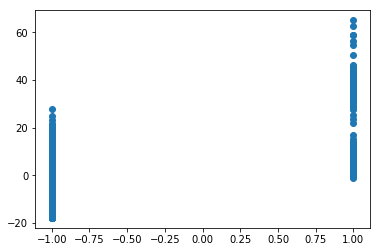

In [182]:
plt.scatter(C,C_pred)

In [162]:
predict([63,1,41.325,155505.18],new_w,new_b)

184.0989231638571